# XB_0082 - Assignment 4 (2022-2023)

This Jupyter notebook aims to apply programming concepts seen during the first four weeks of the course.

## Table of Contents
<div class="toc" style="margin-top: 1em;">
    <ul class="toc-item">
        <li>
            <span><a href="#Introduction-to-this-template-notebook" data-toc-modified-id="Introduction-to-this-template-notebook">Introduction to this template notebook</a></span>
        </li>
        <li>
            <span><a href="#HIV-&-AIDS" data-toc-modified-id="HIV-&-AIDS">HIV &amp; AIDS</a></span>
        </li>
        <li>
            <span><a href="#Task-1:-The-HIV-Dataset" data-toc-modified-id="Task-1:-The-HIV-Dataset">Task 1: The HIV Dataset</a></span>
        </li>
        <li>
            <span><a href="#Task-2:-First-Cases-&-Freddie-Mercury" data-toc-modified-id="Task-2:-First-Cases-&-Freddie-Mercury">Task 2: First Cases &amp; Freddie Mercury</a></span>
        </li>
        <li>
            <span><a href="#Task-3:-Sub-Saharan-Africa" data-toc-modified-id="Task-3:-Sub-Saharan-Africa">Task 3: Sub-Saharan Africa</a></span>
        </li>
        <li>
            <span><a href="#Task-4:-ACT-UP-&-HAART-Treatment" data-toc-modified-id="Task-4:-ACT-UP-&-HAART-Treatment">Task 4: ACT UP &amp; HAART Treatment</a></span>
        </li>
        <li>
            <span><a href="#Task-5:-The-End-of-AIDS?" data-toc-modified-id="Task-5:-The-End-of-AIDS?">Task 5: The End of AIDS?</a></span>
        </li>
        <li>
            <span><a href="#Final-Thoughts" data-toc-modified-id="Final-Thoughts">Final Thoughts</a></span>
        </li>
        <li>
            <span><a href="#References" data-toc-modified-id="References">References</a></span>
        </li>
    </ul>
</div>

`#// BEGIN_COMMON [First] First Things First Section Exercises`

`#// END_COMMON [First]`

In [3]:
#// BEGIN_COMMON [Author]
AUTHOR_NAME = 'Tim Jonatan But'
AUTHOR_ID_NR = '2738575'
AUTHOR_DATE = '2022-11-02'
#// END_COMMON [Author]

In [4]:
# Imports
import csv
from typing import List, Dict

## HIV & AIDS
The Human Immunodeficiency Virus (HIV) is a virus that attacks the immune system—that is, the body cells in charge of fighting infections. Thus, HIV makes infected people more vulnerable to other infections and diseases. The virus is spread by contact with certain body fluids of an HIV-infected person with a high viral load,<sup>1</sup> especially during unprotected sexual intercourse, blood transfusion, or breastfeeding. Without proper treatment, the virus can lead to the development of the Acquired ImmunoDeficiency Syndrome (AIDS). So far, there is no cure for HIV, but people with HIV can have a long and healthy life by following the so-called AntiRetroviral Therapy (ART).

<sub><sup>1</sup> An HIV-infected person on HIV treatment can get and keep an undetectable or low viral load. The treatment decreases the risk of transmission.</sub>

<img src="assets/hiv.jpeg" alt="HIV virus infecting a human cell" width="400"/>

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Fig. 1. HIV virus infecting a human cell.</span>
</div>

### Dataset

To have an idea of how the HIV epidemic has evolved during the last years, we will use the "People living with HIV - All ages" dataset. It was taken from the Joint United Nations Programme on HIV and AIDS (UNAIDS) [data portal](https://aidsinfo.unaids.org/) on the 19th of August of 2021. Some modifications were made for education purposes and stored in the file `people-hiv.csv`. In particular, we have removed footnote columns and added the "continent" column. The dataset is stored as a CSV file, and its values are separated by commas. The dataset contains 35 headers, described as follows. (For more information on the methods used to compute the data, please refer to [this article](https://www.unaids.org/sites/default/files/media_asset/2019-global-AIDS-update_en.pdf).)

<br>

| Column | Description | 
|:-------|:------------|
| country | Country reporting HIV cases |
| continent | Continent where the country is located |
| *year* | Estimated number of cases reported for the given year (from 1990 until 2020) |
| *year_upper* | Upper bound of the estimated number of cases reported for the given year |
| *year_lower* | Lower bound of the estimated number of cases reported for the given year |

<br><br>

**Note:** Each row of the CSV file represents a report of the number of people living with HIV in a given country. The last row (i.e. `'Global'` case) of the dataset reports the aggregated value for all countries. Open and explore the file: This is the first step when solving data science problems. You need to get acquainted with your data!

## Task 1: The HIV Dataset

After exploring the dataset file, we will clean and load the data to be able to make our analyses. To this aim, create the function `read_dataset(path: str) -> List[Dict[str,any]]`, which opens and reads the file given by the `path` parameter. Then, store all its information in the variable `dataset`, which is a list of dictionaries. Each dictionary represents a row of data and should have a key for each column in the CSV file.

Furthermore, before extracting the **numerical** values for each key-pair in a dictionary, you need to clean the data:
* Remove unwanted whitespaces (before, after, and in between the digits)
* Remove the `'<'` symbols. (Some estimated number of cases start with the `'<'` symbol. For this assignment, we will ignore it.)
* Replace the `'...'` values with `-1`. 
* All values should be stored as integers.


**Notes:**
* Investigate and use the `with` statement explained in the *Data Preparation lecture*.
* Using an auxiliary function to clean the numbers is a smart idea. You can later call it from your `read_dataset()` function.
* Be careful with this task. If it is wrong, the rest of the assignments will output a wrong answer!

**Hint:** Investigate the `DictReader()` function from the `csv` module. It might be useful to interact with your dataset.

In [5]:
#// BEGIN_TODO [1_hiv_dataset] The HIV Dataset

# we need to open the csv file as a list of dictionaries
# this can be done with Dict Reader pretty easily
# then all we need to do is remove all spaces and < signs, and replace ... with -1. Then, turn all integer values from strings to integers
# the first part we can do in a funciton open_data, which gives us the raw list of dictionaries
# we will call open_data in read_dataset, and then further edit the list

def open_data(path: str) -> List[Dict[str,any]]:
    
    '''Takes a csv file and returns a list of dicts representing the info contained insisde.
    :param path: path to the csv file.
    :returns: a representation of the csv file as a list containing dicts.
    '''

    with open(path) as data:
        reader : csv.DictReader = csv.DictReader(data)
        
        #currently, reader is of the type csv.DictReader, containing dictionaries. We need to convert it to a list 
        raw_data : List[Dict[str,any]] = [i for i in reader]
    return raw_data


def read_dataset(path: str) -> List[Dict[str,any]]:
    '''Takes a csv file, runs  it though open_data, which turns it into a list of dictionaries, and then cleans it in accordance to the rules: remove all spaces and < signs, and replace ... with -1. Then, making all numerical string values integers
    :param path: path to the csv file
    :returns: a list of dicts that is cleaned up in accordance to rules and represents the original csv file
    '''

    # The only to keys that don't have integer values associated with them
    str_tup: tuple(str) = ("country", "continent")

    # getting our raw_data list of dicts
    raw_data: List[Dict[str,any]] = open_data(path)
    
    # return variable
    dataset: List[Dict[str,any]] = []

    # goes through every value in every dict, cleans it, and then each dict to the variable dataset
    for list_variable in raw_data:
            for dict_variable in list_variable:
                list_variable[dict_variable] = (list_variable[dict_variable].replace("<","").replace("...","-1"))

                # if key is not in str_tup, turns value associated with the key into an integer
                if dict_variable not in str_tup:
                    list_variable[dict_variable] = int(list_variable[dict_variable].replace(" ", ""))

            dataset.append(list_variable)
            
    return dataset

path: str = "datasets\people-hiv.csv"
dataset: List[Dict[str,any]] = read_dataset(path)

#// END_TODO [1_hiv_dataset]

dataset

[{'country': 'Afghanistan',
  'continent': 'Asia',
  '1990': 500,
  '1990_lower': 200,
  '1990_upper': 1000,
  '1991': 500,
  '1991_lower': 200,
  '1991_upper': 1000,
  '1992': 500,
  '1992_lower': 200,
  '1992_upper': 1000,
  '1993': 1000,
  '1993_lower': 500,
  '1993_upper': 1100,
  '1994': 1000,
  '1994_lower': 500,
  '1994_upper': 1300,
  '1995': 1000,
  '1995_lower': 500,
  '1995_upper': 1600,
  '1996': 1000,
  '1996_lower': 500,
  '1996_upper': 1900,
  '1997': 1000,
  '1997_lower': 500,
  '1997_upper': 2100,
  '1998': 1200,
  '1998_lower': 1000,
  '1998_upper': 2500,
  '1999': 1300,
  '1999_lower': 1000,
  '1999_upper': 3000,
  '2000': 1500,
  '2000_lower': 1000,
  '2000_upper': 3600,
  '2001': 1800,
  '2001_lower': 1000,
  '2001_upper': 4100,
  '2002': 2000,
  '2002_lower': 1100,
  '2002_upper': 4800,
  '2003': 2300,
  '2003_lower': 1300,
  '2003_upper': 5700,
  '2004': 2600,
  '2004_lower': 1400,
  '2004_upper': 7000,
  '2005': 2900,
  '2005_lower': 1500,
  '2005_upper': 7200,


## Task 2: First Cases & Freddie Mercury

The virus was first identified in 1981 after doctors started reporting in the United States of America an unusually high rate of rare forms of pneumonia (i.e. pneumocystis pneumonia) and cancer (i.e. Kaposi's sarcoma) among young gay men in Los Angeles and New York. Global media started referring to the disease as gay cancer, gay disease, or gay plague. Researchers and care providers also started calling it the Gay-Related Immune Deficiency (GRID). The uncertainty around the disease and the terminology that surrounded it supported the stigmatization of the gay community and endured the prejudices against homosexuality. Even in the United States, president Ronald Reagan recognized the existence of the disease in 1985, only after more than 12,000 North Americans had silently died from AIDS. No public health response was given in most countries affected by the virus. This systematic discrimination led to infected gay people hiding their sexual orientation and their illness. Nowadays, we know that HIV can infect any person regardless of their sexual orientation, gender, skin color, or age. Nevertheless, vulnerable populations—such as people living in poverty, black communities, and gay communities—are the most affected by the virus due to harmful societal dynamics.

Freddie Mercury—an outstanding artist and the lead vocalist of the band Queen—faced the main AIDS symptoms both at physical and social levels. He never defined his sexuality in public nor he gave details about his health condition. The only exception happened on the 22nd of November, 1991: Freddie Mercury announced that he had been tested HIV positive and had AIDS. He died on the 24th of November, aged 45. He had been privately diagnosed HIV positive four years earlier in 1987. The idol didn't live long enough to leverage the ART treatment. Many anti-AIDS organizations have used these stories to bring awareness to the importance of fighting HIV and AIDS worldwide.

<img src="assets/freddie-mercury.jpeg" alt="Freddi Mercury Live Aid Concert" width="400"/>

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Fig. 2. Freddie Mercury performing at the Live Aid Concert in London, 1985. Find the source <a href="https://www.billboard.com/articles/news/pride/8485190/freddie-mercury-solo-career-things-you-didnt-know">here</a>.</span>
</div>

### Task 2.a.
We would like to know the country with the highest number of people living with HIV per year. Create the `find_most_infected_country()`, which gets an integer with the year as a parameter and returns a dictionary with the information of the country with the highest number of infections. The dictionary must have the following data (and keys):

* `'country'`: the country with the highest number of infections (string).
* `'year'`: year of the search (integer).
* `'cases'`: the number of people living with HIV (integer).

Now, let's see which was the country reporting the highest number of infected people the year that the world lost one of its best artists.

**Notes:**
* Use the `dataset` global variable defined in the previous exercise.
* Consider only the estimated number of cases.
* Exclude the `'Global'` case from the analysis.
* If the year is not part of the dataset `'country'` must be set to `'No data'` and `'cases'` to `-1`.

In [6]:
#// BEGIN_TODO [2.a_first_cases] First Cases & Freddie Mercury
# we have to return the country with the highest number of infections for a given input year
# we will do this by first establishing what happens if there is no country for the specified date - "null output" where {"country": "No data", "year": year, "cases": -1}, then going through every country in the dataset and adding it to a list if it has a positive amount of cases that year
# then we can sort the list, and lastly, get the country with the largest number of infections if the list has any values in it. if not, it defaults back to the so called "null ouptut" established earlier 

def find_most_infected_country(year: int) -> Dict[str,any]:
    ''' Finds the most infected country for a given input year.
    :param year: input year
    :returns: country name, year, and cases for that year. if no country had cases that yea, instead returns "no data", and -1 for country and cases respectively '''
    # Default statement
    mf_country: Dict[str,any] = {"country": "No data", "year": year, "cases": -1}

    # empty (for now) list meant for storing valid countries
    valid_country_list: List[Dict[str,any]] = []

    # adds countries with a positive number of cases for that year to valid_country_list    
    for country_dict in dataset:
        if str(year) in country_dict and country_dict[str(year)] > 0 and country_dict["country"] != "Global":
            valid_country_list.append(country_dict)
            
    # if valid_country_list is not empty, sorts countries by cases that year, and returns the one with most cases
    if len(valid_country_list) > 0:
        valid_country_list.sort(key = lambda a: a[str(year)], reverse=True)
        mf_country["country"] = valid_country_list[0]["country"]
        mf_country["cases"] = valid_country_list[0][str(year)]
        
    return mf_country


#// END_TODO [2.a_first_cases]

find_most_infected_country(1991)

{'country': 'Uganda', 'year': 1991, 'cases': 920000}

### Task 2.b

Now that you are able to find the country with the highest number of people living with HIV, let us have an overview of the period 1990-2020. Create the function `get_most_infected_countries()`, which returns a list of the dictionaries described in task 2.a—one per year in ascending order (from 1990 to 2020).

**Note:** Use the `find_most_infected_country()` defined in the previous exercise.

In [7]:
#// BEGIN_TODO [2.b_first_cases] First Cases & Freddie Mercury
# We need to find the most infected countries from 1990 to 2020. we can do this by looping find_most_infected country in a for loop with inputs in range (1990,2021)
# we get a list of dicts similar in form to the one in task 2.a, for every year between 1990 and 2020
def get_most_infected_countries() -> List[Dict[str,any]]:
    ''' Makes and returns a list of dicts containing country, year, and cases for the most infected country for every year between 1990 and 2020
    :returns: list of countries with most cases for each year from 1990 to 2020. 
    '''
    infected_country_list: List[Dict[str,any]] = [find_most_infected_country(i) for i in range(1990,2021)]
    return infected_country_list

#// END_TODO [2.b_first_cases]

get_most_infected_countries()

[{'country': 'Uganda', 'year': 1990, 'cases': 870000},
 {'country': 'Uganda', 'year': 1991, 'cases': 920000},
 {'country': 'India', 'year': 1992, 'cases': 1100000},
 {'country': 'India', 'year': 1993, 'cases': 1300000},
 {'country': 'India', 'year': 1994, 'cases': 1700000},
 {'country': 'India', 'year': 1995, 'cases': 2000000},
 {'country': 'India', 'year': 1996, 'cases': 2400000},
 {'country': 'India', 'year': 1997, 'cases': 2800000},
 {'country': 'India', 'year': 1998, 'cases': 3200000},
 {'country': 'India', 'year': 1999, 'cases': 3400000},
 {'country': 'India', 'year': 2000, 'cases': 3600000},
 {'country': 'India', 'year': 2001, 'cases': 3600000},
 {'country': 'South Africa', 'year': 2002, 'cases': 3800000},
 {'country': 'South Africa', 'year': 2003, 'cases': 4100000},
 {'country': 'South Africa', 'year': 2004, 'cases': 4400000},
 {'country': 'South Africa', 'year': 2005, 'cases': 4600000},
 {'country': 'South Africa', 'year': 2006, 'cases': 4800000},
 {'country': 'South Africa', '

Think about the output of this task. What can you see from it? You do not need to provide an answer but as a data scientist, it is always important to reflect upon your results.

## Task 3: Sub-Saharan Africa

Although HIV-positive cases—such as Freddie Mercury's case—have become well-known stories representing the impact and severity of HIV and AIDS, western countries are far from being the epicenter of the epidemic. There is scientific evidence that suggests that HIV originated in the 1920s in the now Democratic Republic of Congo. This happened as a result of HIV crossing from chimps to humans; these mammals were hunted and eaten by local communities inhabiting the area. Infected chimps carried the Simian Immunodeficiency Virus (SIV), a virus that is closely related to HIV. However, the outbreak of the virus did not start in Africa but Western countries. It was nearly a decade after that the epidemic took off in the continent, becoming the first cause of death in African countries by 1999.

By 2003, around 6,000 people in sub-Saharan Africa died of AIDS-related diseases. As reported in [this article](https://niemanreports.org/articles/aids-in-africa-a-story-that-must-be-told/), that is twice as many deaths as the ones reported in the September 11th attack on the World Trade Center. Research carried in Africa to understand the spread of the virus has been negatively impacted by Western preconceptions. Underdevelopment and inequality—linked to some of the consequences of Western colonialism and slavery—as well as unstable governments are pointing to be some of the most important causes of public health and social issues. Additionally, to understand and address the problem, researchers and politicians should consider the diversity and complexity of the continent: as emphasized by a group of African citizens involved in the fight against HIV and AIDS, Africa is a continent with 53 countries, with a plethora of ethnic, religious, and linguistic groups. Even though there is still a long road to go, in 2017 the World Health Organization announced that AIDS was no longer the leading cause of death in Africa.

<img src="assets/aids-africa.jpeg" alt="AIDS in Africa" width="400"/>

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Fig. 3. AIDS in Africa. Find the source <a href="https://www.businessinsider.com/hivaids-is-no-longer-the-leading-cause-of-death-in-africa-2017-8?international=true&r=US&IR=T">here</a>.</span>
</div>

### Task 3.a

So far, you have reported the number of people living with HIV per country. Now, we want to aggregate the information per continent. Create the `compute_cases_per_continent()`, which returns a dictionary with the aggregated information of infected people per continent. The keys of the dictionary correspond to the continent name (as it appears in the dataset), and; its values are dictionaries. These nested dictionaries use the years as keys (string) and the number of infected people for each year (integer) as values. 

**Notes:**
* Use the `dataset` global variable.
* Consider only the estimated number of cases.
* Ignore countries where the number of estimated cases is unknown (i.e. `-1`).
* Include the `'Global'` case in the analysis.

**Hint:** Remember that the dataset has data from 1990 until 2020.

In [8]:
#// BEGIN_TODO [3.a_sub-saharan_africa] Sub-Saharan Africa
# we need to sum up the total number of cases per continent per year, and return a dict with keys as continents (including global), and values as dicts. These dicts have keys as years, and values as number of cases for each year from 1990 to 2020
# we can use this by creating a dict "continents" exactly the same in form to the output that we need, but with the dictionary value dictionaries' values all being 0 (ie. {'Asia': {'1990': 0, '1991' : 0, ...}, ...})
# then, we use a for loop to go though each key continent in our continents dict. Inside that for loop, we loop through each dict in the dataset list, and if the dict country is in the releant continent, it goes through every numerical key value, adding the number of infections to each relevant year
def compute_cases_per_continent() -> Dict[str, Dict[str,int]]:
    '''Adds together infections per year per continent, returning a dictionary containing continents as keys and dictionaries as values, which in turn contain years between 1990 and 2020 as keys, and number of infections that year in that continent as values.
    :returns: a dictionary containing continents as keys and dictionaries as values, which in turn contain years between 1990 and 2020 as keys, and number of infections that year in that continent as values
    '''
    # Defining blueprint variable that is structurally identical to output, but where all infections are assumed to be 0
    continents: Dict [str, Dict[str,int]] = {i["continent"]:{str(x):0 for x in range(1990,2021)} for i in dataset}

    # goes through every Key in continents, which is a continent
    for continent in continents:
        # goes through every country in dataset
        for dataset_element in dataset:
            # if continent from continents matches continent from the country in the dataset
            if continent in dataset_element["continent"]:   
                # goes through every value in the dataset_element. If the key is an intger, and it's value is not -1, it is added to the sum of the relevant year for the relevant continent 
                for i in dataset_element:
                    if i.isdigit() and dataset_element[i] != -1:
                        continents[continent][i] += dataset_element[i]
    return continents


#// END_TODO [3.a_sub-saharan_africa]

compute_cases_per_continent()

{'Asia': {'1990': 799500,
  '1991': 1200300,
  '1992': 1646800,
  '1993': 1970300,
  '1994': 2481700,
  '1995': 2867900,
  '1996': 3337800,
  '1997': 3811600,
  '1998': 4266600,
  '1999': 4509000,
  '2000': 4760800,
  '2001': 4790300,
  '2002': 4830400,
  '2003': 4889300,
  '2004': 4719700,
  '2005': 4678700,
  '2006': 4636400,
  '2007': 4491800,
  '2008': 4460600,
  '2009': 4420100,
  '2010': 4368800,
  '2011': 4435700,
  '2012': 4362100,
  '2013': 4316300,
  '2014': 4345500,
  '2015': 4292300,
  '2016': 4323400,
  '2017': 4364400,
  '2018': 4396600,
  '2019': 4336100,
  '2020': 4378300},
 'Europe': {'1990': 194300,
  '1991': 213600,
  '1992': 229800,
  '1993': 244700,
  '1994': 263100,
  '1995': 284300,
  '1996': 312400,
  '1997': 348200,
  '1998': 382500,
  '1999': 424700,
  '2000': 469200,
  '2001': 504300,
  '2002': 538300,
  '2003': 573400,
  '2004': 596600,
  '2005': 613200,
  '2006': 635100,
  '2007': 651700,
  '2008': 663400,
  '2009': 693600,
  '2010': 702800,
  '2011': 70250

### Task 3.b

We want to find now which continent is the one with the highest number of cases per year (similarly to what we did in Task 2.b). We consider the period of 1990-2020. Create the function `get_most_infected_continents()`, which returns a list of the dictionaries with the continent with the highest number of cases for each year in ascending order (from 1990 until 2020). Each dictionary must have the following data (and keys):

* `'continent'`: the continent with the highest number of infections (string).
* `'year'`: year of the search (integer).
* `'cases'`: the number of people living with HIV in a given country and year (integer).

**Notes:**
* Use the output of the `compute_cases_per_continent()` function defined in the previous exercise.
* Exclude the `'Global'` case from the analysis.
* If the year is not part of the dataset `'continent'` must be set to `'No data'` and `'cases'` to `-1`.

**Hint:** Implementing an auxiliary function would be useful to solve this problem (cf. Task 2).

In [13]:
#// BEGIN_TODO [3.b_sub-saharan_africa] Sub-Saharan Africa

# we need to come up with the most infected continent for each year between 1990 and 2020
# we can do this by:
    # goimg through each year in a for loop
    # for each year, we go though the value for said year for every continent except "Global"
    # we record the higest number and respective continent
    # the one that is recorded at the end of the loop is the "winner"

def get_most_infected_continents() -> List[Dict[str,any]] :
    '''Returns a list of dictionaries containinng the most infected continent for a speecific year, the year, and the number of infections for that year, for all years between 1990 and 2020
    :returns: list of dictionaries containing {continent: (most infected continent), year: year, cases: (AIDS cases in that continent for that year)} for every year between 1990 and 2020'''
    
    # calling compute_cases_per_continent() to do computation on, and creating an emptu output list
    cases_per_continent : Dict[str, Dict[str,int]] = compute_cases_per_continent()
    output_list : List[Dict[str,any]] = []

    # applying the method described above
    for i in range(1990,2021):
        # initializing winning_cases
        winning_cases : int = 0
        for continent in cases_per_continent:
            if cases_per_continent[continent][str(i)] > winning_cases and continent != "Global":
                winning_cases = cases_per_continent[continent][str(i)]
                winning_continent : str = continent
        output_list.append({"continent": winning_continent,"year": i, "cases": winning_cases})
    return output_list

#// END_TODO [3.b_sub-saharan_africa]

get_most_infected_continents()

[{'continent': 'Africa', 'year': 1990, 'cases': 5736700},
 {'continent': 'Africa', 'year': 1991, 'cases': 7026700},
 {'continent': 'Africa', 'year': 1992, 'cases': 8423800},
 {'continent': 'Africa', 'year': 1993, 'cases': 9801300},
 {'continent': 'Africa', 'year': 1994, 'cases': 11100400},
 {'continent': 'Africa', 'year': 1995, 'cases': 12510600},
 {'continent': 'Africa', 'year': 1996, 'cases': 13801000},
 {'continent': 'Africa', 'year': 1997, 'cases': 14853300},
 {'continent': 'Africa', 'year': 1998, 'cases': 15968000},
 {'continent': 'Africa', 'year': 1999, 'cases': 16837000},
 {'continent': 'Africa', 'year': 2000, 'cases': 17416300},
 {'continent': 'Africa', 'year': 2001, 'cases': 17955400},
 {'continent': 'Africa', 'year': 2002, 'cases': 18487500},
 {'continent': 'Africa', 'year': 2003, 'cases': 18827900},
 {'continent': 'Africa', 'year': 2004, 'cases': 19264400},
 {'continent': 'Africa', 'year': 2005, 'cases': 19430900},
 {'continent': 'Africa', 'year': 2006, 'cases': 19740400},
 

## Task 4: ACT UP & HAART Treatment

The lack of public measures and attention from the government to the HIV epidemic originated a communal feeling of disregard and abandonment among infected people. This gave rise to a set of movements that protested against the indifference of society. One of the most well-known movements is the AIDS Coalition to Unleash Power (ACT UP). ACT UP was founded in 1987 in New York. They organized protests and scientific programs to fight HIV and AIDS. Many controversies surrounded the actions of the movement, but their effort led to the development of the first ART treatments. In fact, in 1991 the AIDS Clinical Trials Group Protocol 076 study was launched. The study aimed at understanding if the antiretroviral AZT (azidothymidine) could have any effect on avoiding HIV transmission from mother to child during pregnancy. This was the first ART treatment authorized by the Food and Drug Administration (FDA) agency to treat HIV. The treatment would drop the viral load from the mother for a while, reducing the rate of transmission before and during delivery by around 70%. However, the treatment had many collateral effects that raised ethical inquiries.

Finally, the FDA approved the Highly Active Antiretroviral Treatment (HAART) in 1995. HAART is a regime composed of several drugs, maintaining the correct function of the immune system. Once it was incorporated into practice, the rate of AIDS-related deaths and hospitalizations dropped by 60-80%. However, accessing the treatment is possible only for nations and patients that can afford the related costs. Democratizing medicine so it can be affordable for all people has also been part of the agenda of anti-AIDS movements and organizations during the last years.


<img src="assets/act-up.png" alt="AIDS in Africa" width="400"/>

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Fig. 4. ACT UP protests in June 1990 in the United States of America. Find the source <a href="https://www.sfexaminer.com/news/act-up-protesters-reflect-on-aids-demonstrations-25-years-ago/">here</a>.</span>
</div>

### Task 4

We would like to investigate how the HAART treatment impacted the number of people living with HIV. 
To do so, we want to see how the rate of change between 1990-1995 and 1995-2000 has evolved. To do so, we need to compute the rate of change of the periods 1990-1995 and 1995-2000. Afterward, we compute the relative change between these two numbers. 

* First, the **rate of change**–also known as the slope of a linear function–is defined as the rate at which a variable changes in relation to another variable. It is computed as $m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}$, where $m$ is the rate of change we want to compute, $y$ is the dependent variable, and $x$ the independent variable. In our case, $y$ is the number of estimated cases and $x$ the years where these cases were reported.
* Second, the **relative change** is used to show the difference between two quantities. The computation of the relative change is as follows: $relative\_change = \frac{x - x_{ref}}{x_{ref}} \times 100\%$. 

Create the function `compute_relative_change()` that returns a dictionary whose keys are country names (string) and its values are float numbers representing the relative change between the rates of change from 1990-1995 and 1995-2000.

**Notes:**
* Use the `dataset` global variable.
* Consider only the estimated number of cases for each relevant year to compute the rate of change.
* Ignore countries where the number of estimated cases is unknown (i.e. `-1`) for at least one year.
* Ignore countries where the number of estimated cases is equal to `0` for at least one year.
* Include the `'Global'` case in the analysis.
* Set the value of the relative change to `0` if the rate of change from 1990-1995 is equal to `0` (we cannot divide by zero!).

In [17]:
#// BEGIN_TODO [4_act_up_haart] ACT UP & HAART Treatment
# We need to calculate the rate of relative change of infection in each country.
# We can do this by going through each of the countries in our dataset in a for loop
# then, we filter out all countries that have no values at 1990, 1995, and 2000. we also filter out countries that have had estimated cases equal zero ever.
# afterwareds, we calculate the old roc and new roc, and apply the formula for relative roc (if old roc is 0, we just make the final relative roc value 0)
# we then add the value to a dictionary, with the name of the country as a key, and the relative roc as a key

def compute_relative_change() -> Dict[str,float]:
    ''' calculates all viable relative roc's between the roc[1990-1995], anad roc[1995-2000]
    :returns: dict with keys as country names and values as relative roc for the time periods
    '''

    # empty dict. this is our return variable
    change_dict: Dict[str,float] = {}

    # defining dates
    reference_dates: tuple(str) = "1990", "1995"
    new_dates: tuple(str) = "1995", "2000"

    for i in dataset:

        # defining what to exclude
        if -1 in [i[reference_dates[1]], i[reference_dates[0]], i[new_dates[1]], i[new_dates[0]]] or 0 in [i[j] for j in i]:
            continue

        # rate of change = dy/dx
        old_roc: float = (i[reference_dates[1]]-i[reference_dates[0]]) / (int(reference_dates[1])-int(reference_dates[0]))
        new_roc: float = (i[new_dates[1]]-i[new_dates[0]]) / (int(new_dates[1])-int(new_dates[0]))

        # sets relative roc to 0 if the old roc is 0
        if old_roc == 0:
            change_dict[i["country"]] = 0.0
            continue

        # calculation for relative roc and addition to the dictionary
        relative_roc: float = 100 * ((new_roc - old_roc) / old_roc)
        change_dict[i["country"]] = relative_roc

    return change_dict
    
#// END_TODO [4_act_up_haart]

compute_relative_change()

{'Afghanistan': 0.0,
 'Albania': 0.0,
 'Algeria': 100.0,
 'Angola': 107.6923076923077,
 'Argentina': -23.076923076923077,
 'Armenia': 800.0,
 'Australia': -9.090909090909092,
 'Azerbaijan': 287.5,
 'Bahamas': -78.57142857142857,
 'Belarus': 225.0,
 'Belize': 150.0,
 'Benin': -34.78260869565217,
 'Bhutan': 200.0,
 'Bolivia (Plurinational State of)': 121.73913043478262,
 'Botswana': -28.57142857142857,
 'Brazil': 50.0,
 'Burkina Faso': -125.0,
 'Burundi': -125.0,
 'Cabo Verde': 50.0,
 'Cambodia': 69.49152542372882,
 'Cameroon': 42.857142857142854,
 'Canada': 0.0,
 'Central African Republic': -73.33333333333333,
 'Chad': -36.58536585365854,
 'Chile': 67.74193548387096,
 'Colombia': -25.581395348837212,
 'Comoros': 0.0,
 'Congo': -74.07407407407408,
 'Costa Rica': 10.0,
 'Croatia': -100.0,
 'Cuba': 400.0,
 "Câ„¢te d'Ivoire": -71.42857142857143,
 'Democratic Republic of the Congo': -70.0,
 'Denmark': -23.076923076923077,
 'Djibouti': 164.86486486486487,
 'Dominican Republic': -41.3043478260

Run the code in the next cell to see how the rate of change has decreased or increased for each country and the special case `'Global'`. Is the situation better after 1995? Is there a big difference between countries? What is happening with the `'Global'` case?

[<function <lambda> at 0x000001A6A7738280>]


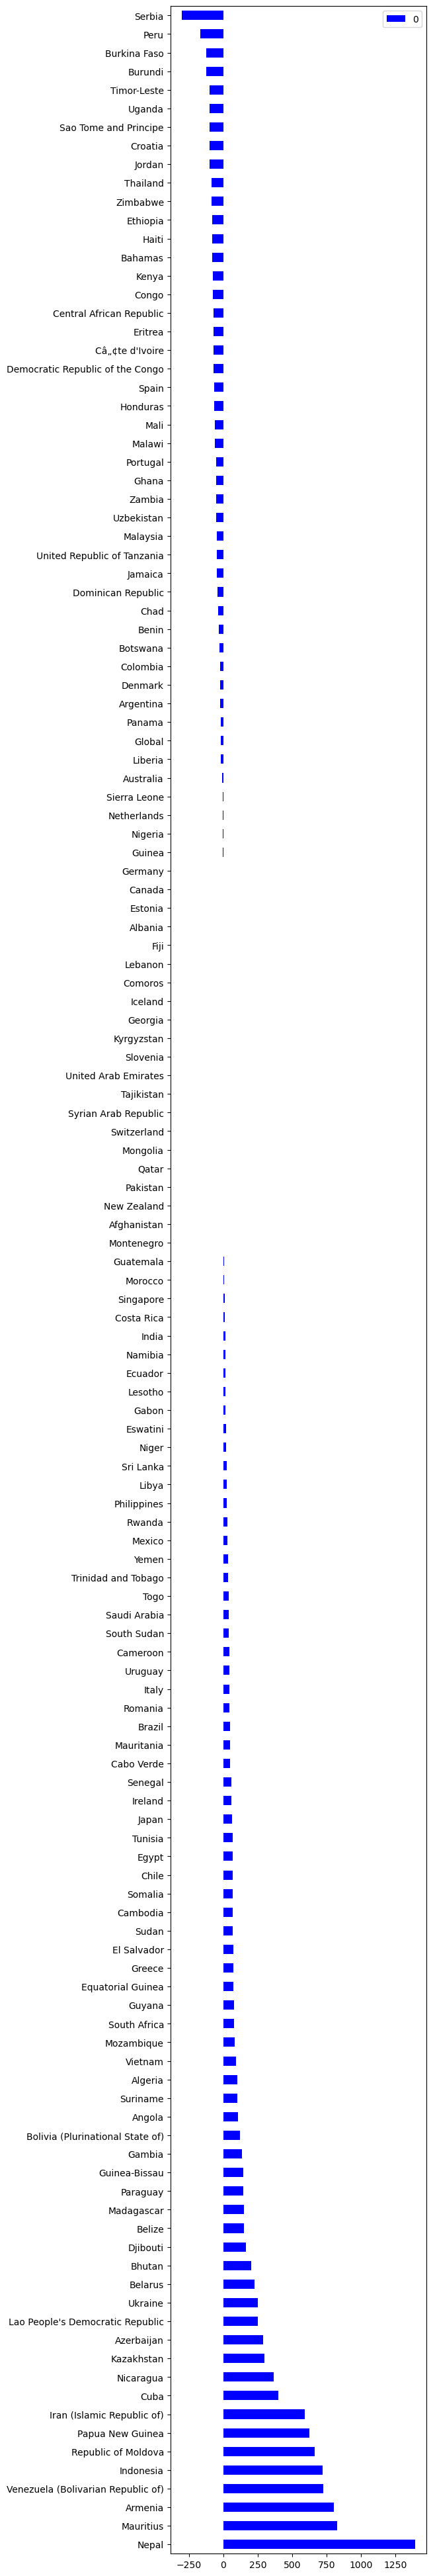

In [15]:
import pandas as pd

def create_rel_change_hist(rel_change: Dict[str, float]) -> None:
    """ Uses Pandas to plot the histogram with the 
        relative changes between the rates of change
        from 1990-1995 and 1995-2000.
    """
    df = pd.DataFrame.from_dict(rel_change, orient="index")
    df = df.sort_values(by=0, ascending=False)
    df.plot.barh(color="b", figsize=(5,50))

rel_change = compute_relative_change()
create_rel_change_hist(rel_change)



hex = { 1: 2, 2: 123, 4: 122}

i = [lambda a: hex[a]]
print(i)

## Task 5: The End of AIDS?

In 2015, the United Nations General Assembly defined a list of 17 global goals designed as a blueprint to have a more sustainable and better future for everyone on Earth. These goals are known as the Sustainable Development Goals (SDGs) and they are meant to be achieved by 2030. In particular, Member States promised to achieve the end of AIDS by 2030. This is done as part of the targets associated with ensuring healthy lives for all people. It is also related to other goals such as ending poverty (Goal 1) and hunger (Goal 2), ensuring quality education (Goal 4), achieving gender equality (Goal 5), promoting economic growth (Goal 8), reducing inequality (Goal 10), making cities safe and resilient (Goal 11), promoting peaceful and inclusive societies (Goal 16), and strengthening means of implementation (Goal 17). For more information on how these goals can improve the current situation of the HIV/AIDS epidemic go to [this website](https://www.unaids.org/en/AIDS_SDGs).

> A core principle of the 17 Sustainable Development Goals (SDGs), and of the AIDS response, is that no one should be left behind. The AIDS epidemic cannot be ended without the needs of people living with and affected by HIV, and the determinants of health and vulnerability, being addressed. People living with HIV often live in fragile communities and are frequently discriminated against, marginalized and affected by inequality and instability—their concerns therefore must be at the forefront of sustainable development efforts. - UNAIDS on "AIDS and the sustainable development goals"

![17 SDG](assets/sdg.png)

Ending AIDS by 2030 sounds like a big challenge. We would like to have an idea about the size of the problem we are facing as humanity. Thus, create the function `estimate_aids_end()`, which returns a list with three float items:

1. The first item of the list represents the `'Global'` rate of change of the number of HIV cases from 2000 until 2020.
2. The second item of the list represents the `'Global'` rate of change of the number of HIV cases from 2020 until 2030, so by 2030, we can expect a total of `0` cases.
3. The last item of the list represents the relative change between the two previous rates.

**Notes:**
* Use the `dataset` global variable.
* Consider only the estimated number of cases for each relevant year to compute the measures.
* If at least one of the measures cannot be computed (e.g. avoiding division by zero), return the following list: `[-1, -1, -1]`.
* Use the definitions of the rate of change and the relative change introduced in the previous tasks.

In [12]:
#// BEGIN_TODO [5_end_of_aids] ACT UP & HAART Treatment

def estimate_aids_end() -> List[float]:
    '''Calculates the global roc for 2000 to 2020, the global roc from 2020 to 2030 assuming AIDS ceases to exist, and the relative roc between the two values
    :Returns: list containing 3 floats, respective to what is mentioned above'''

    # old roc
    roc_00_20 = (dataset[-1]["2020"]-dataset[-1]["2000"]) / (2020 - 2000)

    # new roc
    roc_20_30 = (0-dataset[-1]["2020"]) / (2030 - 2020)

    # relative roc
    relative_roc: float = 100 * ((roc_20_30 - roc_00_20) / roc_00_20)

    # return variable and statement
    return_list = [roc_00_20, roc_20_30, relative_roc]
    return return_list


#// END_TODO [5_end_of_aids]

estimate_aids_end()

[610000.0, -3770000.0, -718.032786885246]

What do you think about the output of this task? Will we be able to achieve the 2030 goal?

## Final Thoughts

> 'HIV/AIDS remains highly stigmatized because it is sexually transmitted. Every society attaches its own particular taboos or exerts a tremendous amount of judgment surrounding sexual practices. There’s a prevailing attitude that a person who acquires a disease through sex “deserves their fate” or “was asking for it.” Some people also think it’s OK to discriminate against people who use drugs, people who engage in sex work, and LGBT people. Of course, such thinking is the height of hypocrisy, not to mention inhumane, but it makes it very easy to write off entire populations as being unworthy of our help and concern. As a result, HIV/AIDS remains a disease of the marginalized, the poor, and the dispossessed.' - Elton John on World Day AIDS for MSNBC. (Find the article [here](https://www.msnbc.com/msnbc/exclusive-elton-john-world-aids-compassion-will-end-epidemic-msna732166).) 

## References

### About HIV and AIDS
- [What Is HIV?](https://www.hiv.gov/hiv-basics/overview/about-hiv-and-aids/what-are-hiv-and-aids)
- [Origin of HIV & AIDS](https://www.avert.org/professionals/history-hiv-aids/origin)
- [History of HIV and AIDS overview](https://www.avert.org/professionals/history-hiv-aids/overview#footnote41_ef41igw)

### About AIDS Stigma and Discrimination
- [LGBTQ History Month: The early days of America's AIDS crisis](https://www.nbcnews.com/feature/nbc-out/lgbtq-history-month-early-days-america-s-aids-crisis-n919701)
- [Three decades later, men who survived the 'gay plague' speak out](https://www.nbcnews.com/feature/nbc-out/three-decades-later-men-who-survived-gay-plague-speak-out-n825621)

### About AIDS in Africa
- [Mapping HIV prevalence in sub-Saharan Africa between 2000 and 2017](https://www.nature.com/articles/s41586-019-1200-9)
- [The Story of AIDS in Africa](https://www.theatlantic.com/international/archive/2011/12/the-story-of-aids-in-africa/249361/)
- [AIDS in Africa: A Story That Must Be Told](https://niemanreports.org/articles/aids-in-africa-a-story-that-must-be-told/)
- [AIDS in Africa: Three scenarios to 2025](https://www.unaids.org/sites/default/files/media_asset/jc1068-scenarios-execsumm_en_0.pdf)
- [HIV/AIDS is no longer the leading cause of death in Africa](https://www.businessinsider.com/hivaids-is-no-longer-the-leading-cause-of-death-in-africa-2017-8?international=true&r=US&IR=T)

### About ACT UP & and Fighting AIDS
- [How ACT UP Changed America](https://www.newyorker.com/magazine/2021/06/14/how-act-up-changed-america)
- [How To Demand A Medical Breakthrough: Lessons From The AIDS Fight](https://www.npr.org/sections/health-shots/2019/02/09/689924838/how-to-demand-a-medical-breakthrough-lessons-from-the-aids-fight)
- [How Much Does HIV Treatment Cost?](https://www.webmd.com/hiv-aids/hiv-treatment-cost)
- [AIDS and the Sustainable Development Goals](https://www.unaids.org/en/AIDS_SDGs)

---

# (End of Notebook)

&copy; 2020-2022 - **TU/e** - **VU Amsterdam**